In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline   
%pylab inline 
sns.set(color_codes=True)

Populating the interactive namespace from numpy and matplotlib


# Loading Dataset 

In [2]:
filename = "/Users/shivampanwar/Desktop/NetflixDatasets/netflix_titles.csv"
NetflixData=pd.read_csv(filename)

In [3]:
NetflixData.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
NetflixData.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,70153404,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


In [5]:
NetflixData.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
NetflixData['rating'].describe()

count      6224
unique       14
top       TV-MA
freq       2027
Name: rating, dtype: object

In [7]:
NetflixData.shape

(6234, 12)

# Cleaning Netflix Dataset

### Checking for NaN values

In [8]:
print("No of Nan values in our dataframe : ", sum(NetflixData.isnull().any()))

No of Nan values in our dataframe :  5


In [9]:
NetflixData=NetflixData.dropna()

### Removing Duplicates

In [10]:
duplicate_rows_NetflixData = NetflixData[NetflixData.duplicated()]
print("number of duplicate rows: ", duplicate_rows_NetflixData.shape)

number of duplicate rows:  (0, 12)


In [11]:
NetflixData = NetflixData.drop_duplicates()
NetflixData.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [12]:
NetflixData.count()

show_id         3774
type            3774
title           3774
director        3774
cast            3774
country         3774
date_added      3774
release_year    3774
rating          3774
duration        3774
listed_in       3774
description     3774
dtype: int64

### Basic Statistics (#Ratings and Shows on Netflix)

In [13]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",NetflixData.shape[0])
print("Total No of Shows   :", len(np.unique(NetflixData.show_id)))

Total data 
--------------------------------------------------

Total no of ratings : 3774
Total No of Shows   : 3774


# Data Analysis on Data

### Maximum Releasing Years on netflix 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cb39550>]],
      dtype=object)

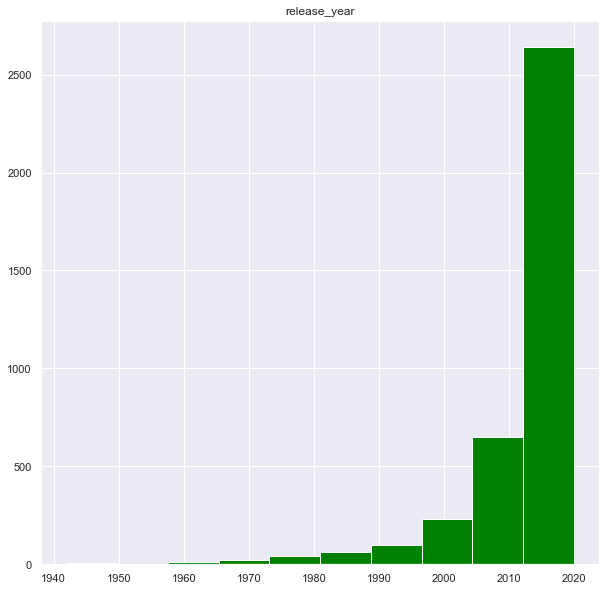

In [14]:
NetflixData.hist(column='release_year', color = "green", figsize=(10,10))

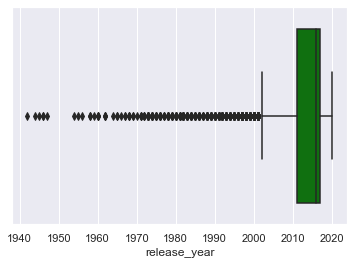

In [15]:
sns.boxplot(x=NetflixData['release_year'], color = "green")

### Highest Rating of Shows

In [16]:
DifferentRatings= len(np.unique(NetflixData.rating))
print("Types of Rating given to Shows on Netflix: ",DifferentRatings)

Types of Rating given to Shows on Netflix:  14


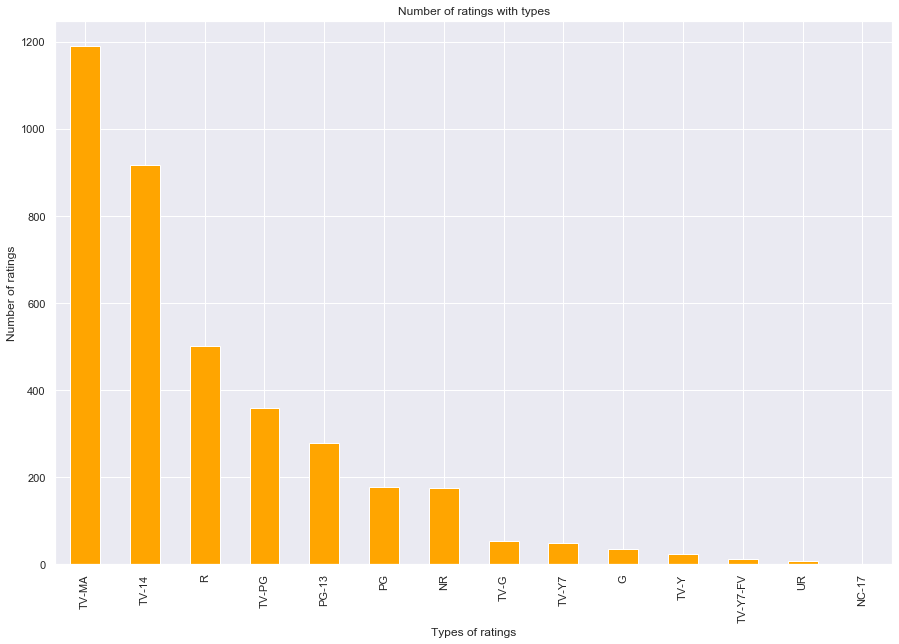

In [17]:
NetflixData.rating.value_counts().nlargest(40).plot(kind='bar', figsize=(15,10), color = "orange")
plt.title("Number of ratings with types")
plt.ylabel('Number of ratings')
plt.xlabel('Types of ratings');

### Types of Shows 

In [18]:
DifferentTypes=len(np.unique(NetflixData.type))
print("Types of shows on Netflix",DifferentTypes)

Types of shows on Netflix 2


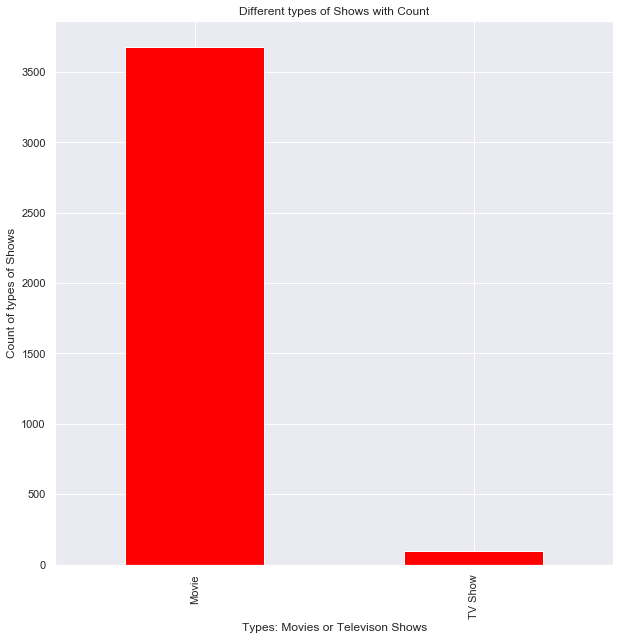

In [19]:
NetflixData.type.value_counts().nlargest(10).plot(kind='bar', figsize=(10,10), color = "red")
plt.title("Different types of Shows with Count")
plt.ylabel('Count of types of Shows')
plt.xlabel('Types: Movies or Televison Shows');

### Countries In Which Shows were Released

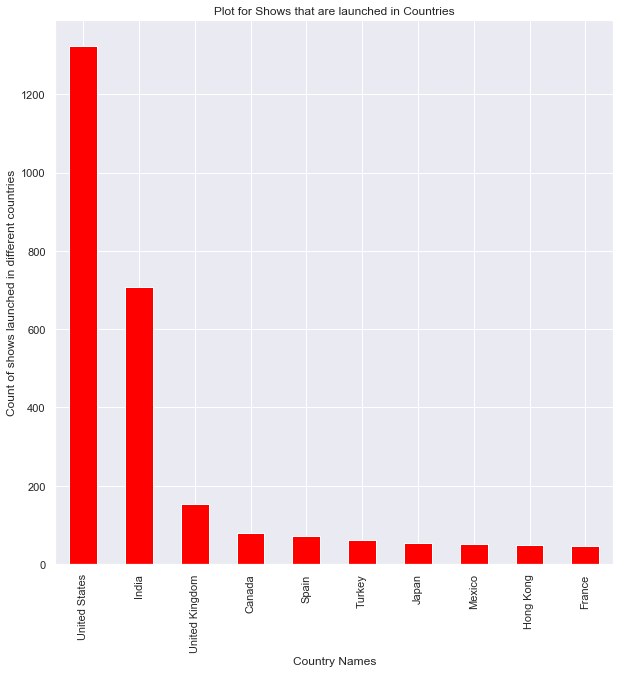

In [20]:
NetflixData.country.value_counts().nlargest(10).plot(kind='bar', figsize=(10,10), color = "red")
plt.title("Plot for Shows that are launched in Countries")
plt.ylabel('Count of shows launched in different countries')
plt.xlabel('Country Names');

### Scatter Plot between Title and Ratings

### Correlation Matrix for the Data

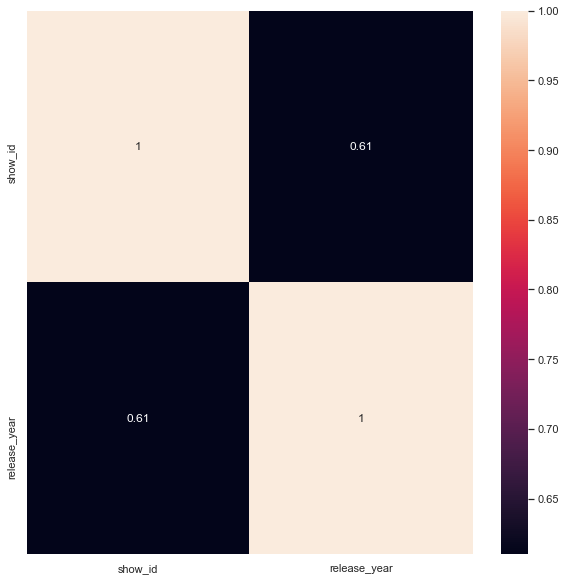

In [21]:
plt.figure(figsize=(10,10))
correlation_matrix = NetflixData.corr().round(2)

# annot = True to print the values inside the square

sns.heatmap(data=correlation_matrix, annot=True)

### Dropping Unused Column

In [22]:
NetflixData = NetflixData.drop(['date_added','listed_in','description','cast','duration'], axis=1)
train = NetflixData.drop(NetflixData, axis=1)
NetflixData.head(5)

,show_id,type,title,director,country,release_year,rating
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","United States, India, South Korea, China",2019,TV-PG
4,80125979,Movie,#realityhigh,Fernando Lebrija,United States,2017,TV-14
6,70304989,Movie,Automata,Gabe Ibáñez,"Bulgaria, United States, Spain, Canada",2014,R
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Chile,2017,TV-MA
9,70304990,Movie,Good People,Henrik Ruben Genz,"United States, United Kingdom, Denmark, Sweden",2014,R


In [23]:
NetflixData = NetflixData.rename(columns={'show_id': 'ShowId', 'release_year': 'ReleaseYear'})
NetflixData.head(5)

,ShowId,type,title,director,country,ReleaseYear,rating
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","United States, India, South Korea, China",2019,TV-PG
4,80125979,Movie,#realityhigh,Fernando Lebrija,United States,2017,TV-14
6,70304989,Movie,Automata,Gabe Ibáñez,"Bulgaria, United States, Spain, Canada",2014,R
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Chile,2017,TV-MA
9,70304990,Movie,Good People,Henrik Ruben Genz,"United States, United Kingdom, Denmark, Sweden",2014,R


In [24]:
NetflixData.shape

(3774, 7)

## Training and Modeling of Dataset

### K Neighbour Classifier Model

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [26]:
train, test = train_test_split(NetflixData, test_size = 0.15)

In [27]:
#Define the set of features that we want to look at
features = ["ShowId"]
target = ['ReleaseYear']

#Split the data into x and y test and train sets to feed them into a bunch of classifiers!
x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

In [28]:
#KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=100, metric='euclidean')
knn.fit(x_train, y_train)

# knn_pred = c.predict(x_test)
knn_pred = knn.predict(x_test)

score= accuracy_score(y_test, knn_pred) * 100

print("Accuracy using Knn Tree: ", round(score, 1), "%")

Accuracy using Knn Tree:  44.8 %


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


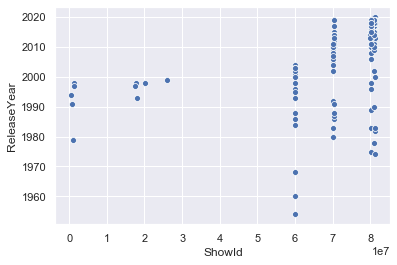

In [29]:
sns.scatterplot(
    x='ShowId',
    y='ReleaseYear',
#     hue='benign',
    data=x_test.join(y_test, how='outer')
)

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, knn_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, knn_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, knn_pred)))

Mean Absolute Error: 2.312169312169312
Mean Squared Error: 43.560846560846564
Root Mean Squared Error: 6.600064133085872


In [31]:
# df=pd.DataFrame({'Actual':y_test, 'Predicted':knn_pred})
# df

### Decison Tree Classifier Model

In [32]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [33]:
feature_cols =['ShowId']
X = NetflixData[feature_cols] # Features
y = NetflixData.ReleaseYear  

In [34]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% training and 30% test

In [35]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [36]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy using Decision Tree Model:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy using Decision Tree Model: 34.68667255075022


In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.0335392762577227
Mean Squared Error: 64.06266548984996
Root Mean Squared Error: 8.003915634853353


In [38]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
805,1973,2018
5580,2015,2015
3634,2016,2017
2942,2018,2017
1484,2015,2018
...,...,...
4762,2015,2015
839,2005,2007
2919,2019,2018
2041,2016,2017


### AdaBoost Classifier Model

In [39]:
train, test = train_test_split(NetflixData, test_size = 0.15)

In [40]:
#Define the set of features that we want to look at
features = ["ShowId"]
target = ['ReleaseYear']

#Split the data into x and y test and train sets to feed them into a bunch of classifiers!
x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

In [41]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=3)
ada.fit(x_train, y_train)

ada_pred = ada.predict(x_test)

from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, ada_pred) * 100
print("Accuracy using AdaBoost Model: ", round(score, 2), "%")

Accuracy using AdaBoost Model:  24.69 %


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ada_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ada_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ada_pred)))

Mean Absolute Error: 3.5167548500881836
Mean Squared Error: 55.880070546737215
Root Mean Squared Error: 7.475297355071383


## SVM Model  

In [43]:
from sklearn import svm
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [44]:
feature_cols =['ShowId']
X = NetflixData[feature_cols] # Features
y = NetflixData.ReleaseYear  

In [45]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% training and 30% test

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)